In [1]:
!pip install shap


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

import shap


In [3]:
df = pd.read_csv("customer_.csv")

df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0


In [4]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
df.ffill(inplace = True)

In [6]:
df = pd.get_dummies(df, drop_first = True)

In [7]:
X = df.drop("Churn", axis =1)
Y = df["Churn"]

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [9]:

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)



RandomForestClassifier(random_state=42)

In [10]:
##### Model explaination by SHAP

In [11]:
# for 500 rows
small_X_train = shap.sample(X_train, 500)  

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(small_X_train[:500])


In [12]:

print("SHAP values shape:", shap_values.shape)

print("X_train shape:", small_X_train.shape)  

SHAP values shape: (500, 13, 2)
X_train shape: (500, 13)


In [13]:
print(type(shap_values))  # Check the type of shap_values


<class 'numpy.ndarray'>


<Figure size 640x480 with 0 Axes>

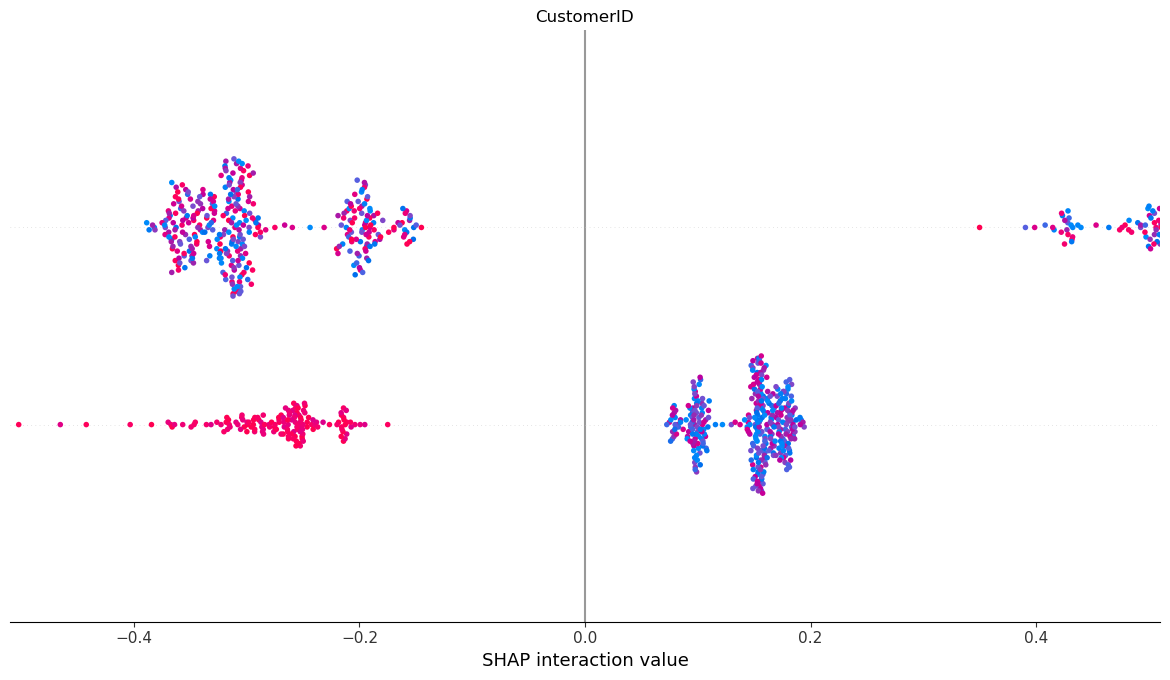

In [14]:

shap.summary_plot(shap_values, small_X_train.iloc[:1000])
